In [21]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
#scaling and normalization
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from pandas.api.types import CategoricalDtype

In [22]:
raw_data = pd.read_csv('/Users/roya/Downloads/financial_transactions.csv')
raw_data

,transaction_id,date,customer_id,amount,type,description
0,1,2020-10-26,926,6478.39,credit,Expect series shake art again our.
1,2,2020-01-08,466,1255.95,credit,Each left similar likely coach take.
2,3,2019-09-02,110,7969.68,debit,Direction wife job pull determine leader move ...
3,4,2020-12-02,142,2927.41,credit,Agree reveal buy black already.
4,5,2020-12-02,944,4661.88,debit,Child relationship show college whom speech.
...,...,...,...,...,...,...
99995,99996,2020-09-07,40,8572.18,debit,Clear main main rise population.
99996,99997,2021-09-24,951,1861.95,credit,Manager modern movement even common name artis...
99997,99998,2020-09-10,533,8265.77,transfer,Describe skin process key school arm for.
99998,99999,2022-08-22,65,6874.50,debit,Product be lay.


In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     100000 non-null  int64  
 3   amount          100000 non-null  float64
 4   type            100000 non-null  object 
 5   description     100000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [24]:
raw_data.isna().sum()

transaction_id    0
date              0
customer_id       0
amount            0
type              0
description       0
dtype: int64

In [25]:
raw_data.describe()

,transaction_id,customer_id,amount
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,499.594710,5009.012768
std,28867.657797,288.973503,2888.443654
min,1.000000,1.000000,1.290000
25%,25000.750000,249.000000,2514.572500
50%,50000.500000,499.000000,5006.135000
75%,75000.250000,750.000000,7513.840000
max,100000.000000,1000.000000,10000.000000


In [26]:
raw_data.duplicated().sum()

0

In [27]:
raw_data.nunique().to_frame('number of unique values')

,number of unique values
transaction_id,100000
date,1827
customer_id,1000
amount,95195
type,3
description,100000


Clean the Data

In [28]:
cleaned_data = raw_data.drop(['description'], axis=1)
cleaned_data

,transaction_id,date,customer_id,amount,type
0,1,2020-10-26,926,6478.39,credit
1,2,2020-01-08,466,1255.95,credit
2,3,2019-09-02,110,7969.68,debit
3,4,2020-12-02,142,2927.41,credit
4,5,2020-12-02,944,4661.88,debit
...,...,...,...,...,...
99995,99996,2020-09-07,40,8572.18,debit
99996,99997,2021-09-24,951,1861.95,credit
99997,99998,2020-09-10,533,8265.77,transfer
99998,99999,2022-08-22,65,6874.50,debit


In [29]:
cleaned_data['date'] = pd.to_datetime(cleaned_data['date']) #convert dtype of 'date' column to datetime64[ns]

In [30]:
cleaned_data['day'] = cleaned_data['date'].dt.day
cleaned_data['month'] = cleaned_data['date'].dt.strftime('%b')
cleaned_data['year'] = cleaned_data['date'].dt.year
cleaned_data['day_of_week'] = cleaned_data['date'].dt.strftime('%a')

In [31]:
#scaling and normalization
original_data = np.array(cleaned_data['amount'].tolist(), float)
scaled_data = minmax_scaling(original_data, columns = [0])
normalized_data = stats.boxcox(original_data)

In [32]:
cleaned_data.head()

,transaction_id,date,customer_id,amount,type,day,month,year,day_of_week
0,1,2020-10-26,926,6478.39,credit,26,Oct,2020,Mon
1,2,2020-01-08,466,1255.95,credit,8,Jan,2020,Wed
2,3,2019-09-02,110,7969.68,debit,2,Sep,2019,Mon
3,4,2020-12-02,142,2927.41,credit,2,Dec,2020,Wed
4,5,2020-12-02,944,4661.88,debit,2,Dec,2020,Wed


In [33]:
cleaned_data = cleaned_data.drop(['date'], axis=1)
cleaned_data.head()

,transaction_id,customer_id,amount,type,day,month,year,day_of_week
0,1,926,6478.39,credit,26,Oct,2020,Mon
1,2,466,1255.95,credit,8,Jan,2020,Wed
2,3,110,7969.68,debit,2,Sep,2019,Mon
3,4,142,2927.41,credit,2,Dec,2020,Wed
4,5,944,4661.88,debit,2,Dec,2020,Wed


Data Visualization

In [34]:
# Number of transactions by dates

# By year
trans_by_year = cleaned_data.groupby('year').size().reset_index()
trans_by_year.columns = ['year', 'count']

# By month
trans_by_month = cleaned_data.groupby('month').size().reset_index()
trans_by_month.columns = ['month', 'count']

cats = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cat_type = CategoricalDtype(categories=cats, ordered=True)
trans_by_month['month'] = trans_by_month['month'].astype(cat_type)

# By day
trans_by_day = cleaned_data.groupby('day').size().reset_index()
trans_by_day.columns = ['day', 'count']

# By day of week
trans_by_day_of_week = cleaned_data.groupby('day_of_week').size().reset_index()
trans_by_day_of_week.columns = ['day_of_week', 'count']

cats = [ 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
cat_type = CategoricalDtype(categories=cats, ordered=True)
trans_by_day_of_week['day_of_week'] = trans_by_day_of_week['day_of_week'].astype(cat_type)

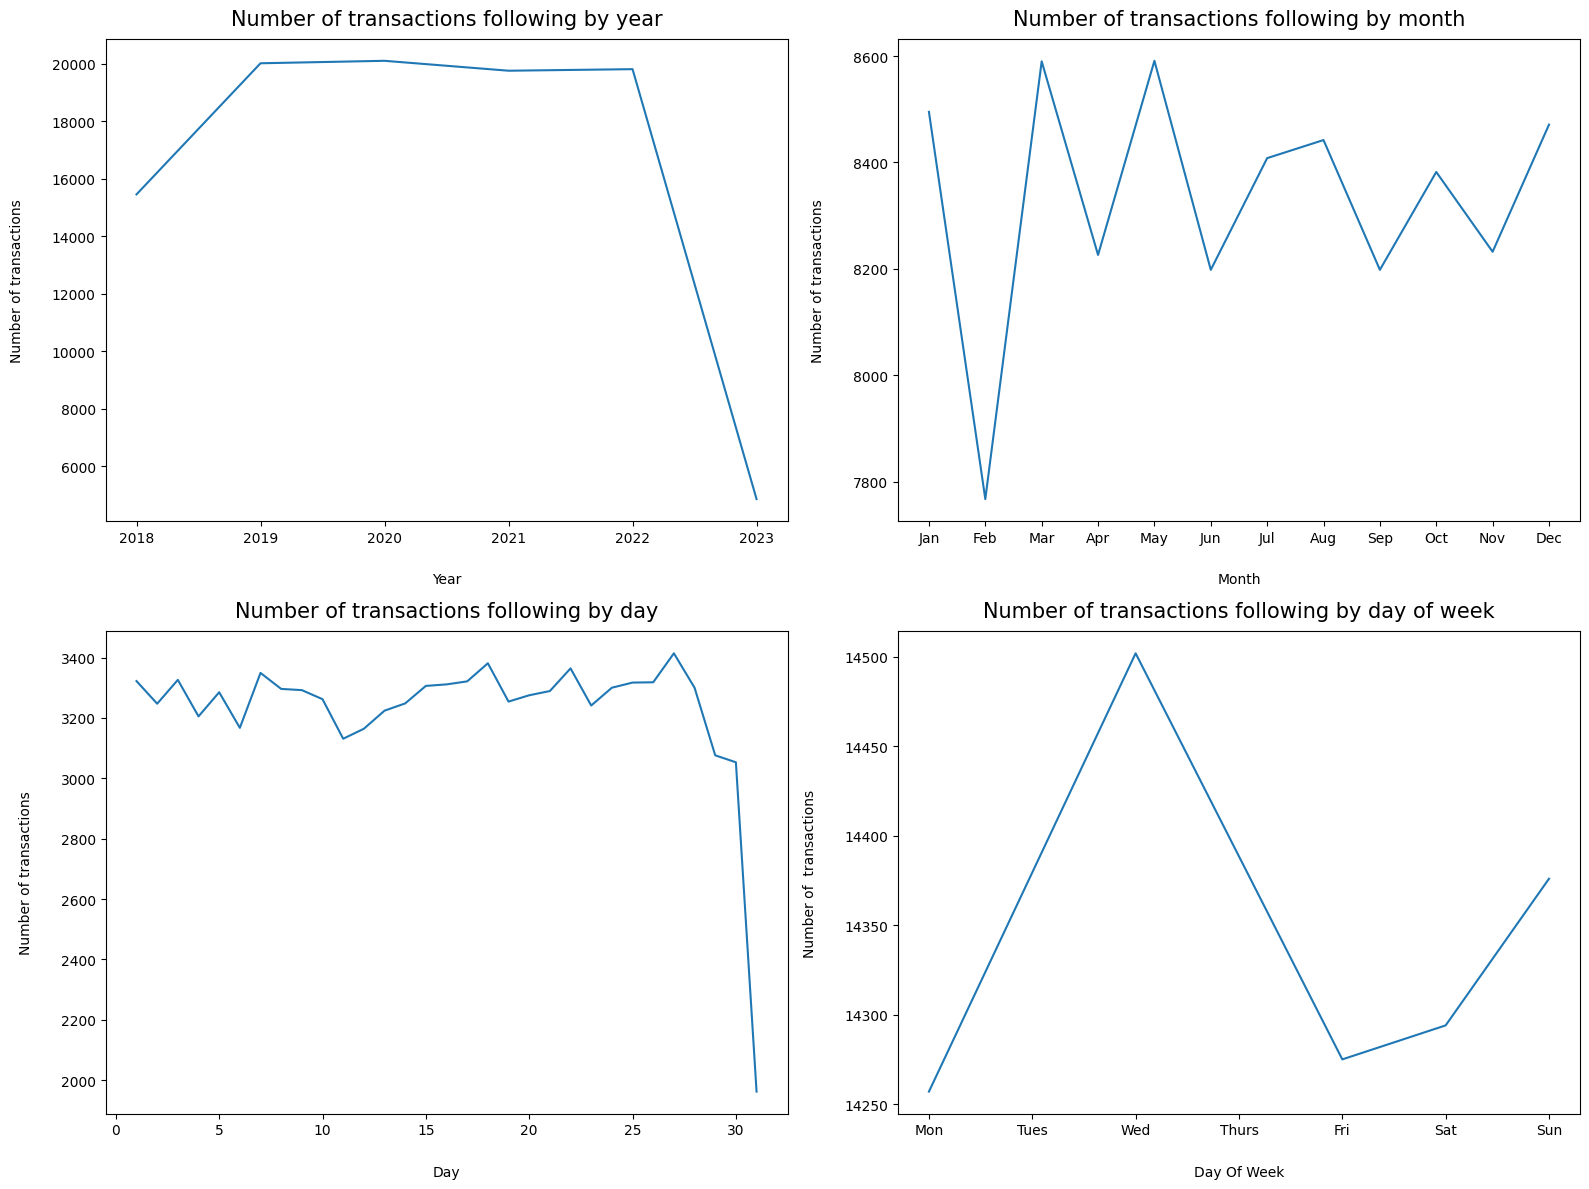

In [35]:
fig, axes = plt.subplots(2, 2 , figsize = (16, 12))

sns.lineplot(ax = axes[0, 0], data = trans_by_year, x = 'year', y = 'count')
sns.lineplot(ax = axes[0, 1], data = trans_by_month, x = 'month', y = 'count')
sns.lineplot(ax = axes[1, 0], data = trans_by_day, x = 'day', y = 'count')
sns.lineplot(ax = axes[1, 1], data = trans_by_day_of_week, x = 'day_of_week', y = 'count')

axes[0, 0].set_title("Number of transactions following by year", pad=10, fontsize=15)
axes[0, 0].set_ylabel("Number of transactions", labelpad=20)
axes[0, 0].set_xlabel("Year", labelpad=20)

axes[0, 1].set_title("Number of transactions following by month", pad=10, fontsize=15)
axes[0, 1].set_ylabel("Number of transactions", labelpad=20)
axes[0, 1].set_xlabel("Month", labelpad=20)

axes[1, 0].set_title("Number of transactions following by day", pad=10, fontsize=15)
axes[1, 0].set_ylabel("Number of transactions", labelpad=20)
axes[1, 0].set_xlabel("Day", labelpad=20)

axes[1, 1].set_title("Number of transactions following by day of week", pad=10, fontsize=15)
axes[1, 1].set_ylabel("Number of  transactions", labelpad=20)
axes[1, 1].set_xlabel("Day Of Week", labelpad=20)

plt.tight_layout()
plt.show()

In [36]:
# Amount of transactions by dates

# By year
amount_trans_by_year = cleaned_data.groupby('year')['amount'].sum().reset_index()
amount_trans_by_year.columns = ['year', 'total']

# By month
amount_trans_by_month = cleaned_data.groupby('month')['amount'].sum().reset_index()
amount_trans_by_month.columns = ['month', 'total']

cats = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cat_type = CategoricalDtype(categories=cats, ordered=True)
amount_trans_by_month['month'] = amount_trans_by_month['month'].astype(cat_type)

# By day
amount_trans_by_day = cleaned_data.groupby('day')['amount'].sum().reset_index()
amount_trans_by_day.columns = ['day', 'total']

# By day of week
amount_trans_by_day_of_week = cleaned_data.groupby('day_of_week')['amount'].sum().reset_index()
amount_trans_by_day_of_week.columns = ['day_of_week', 'total']

cats = [ 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
cat_type = CategoricalDtype(categories=cats, ordered=True)
amount_trans_by_day_of_week['day_of_week'] = amount_trans_by_day_of_week['day_of_week'].astype(cat_type)

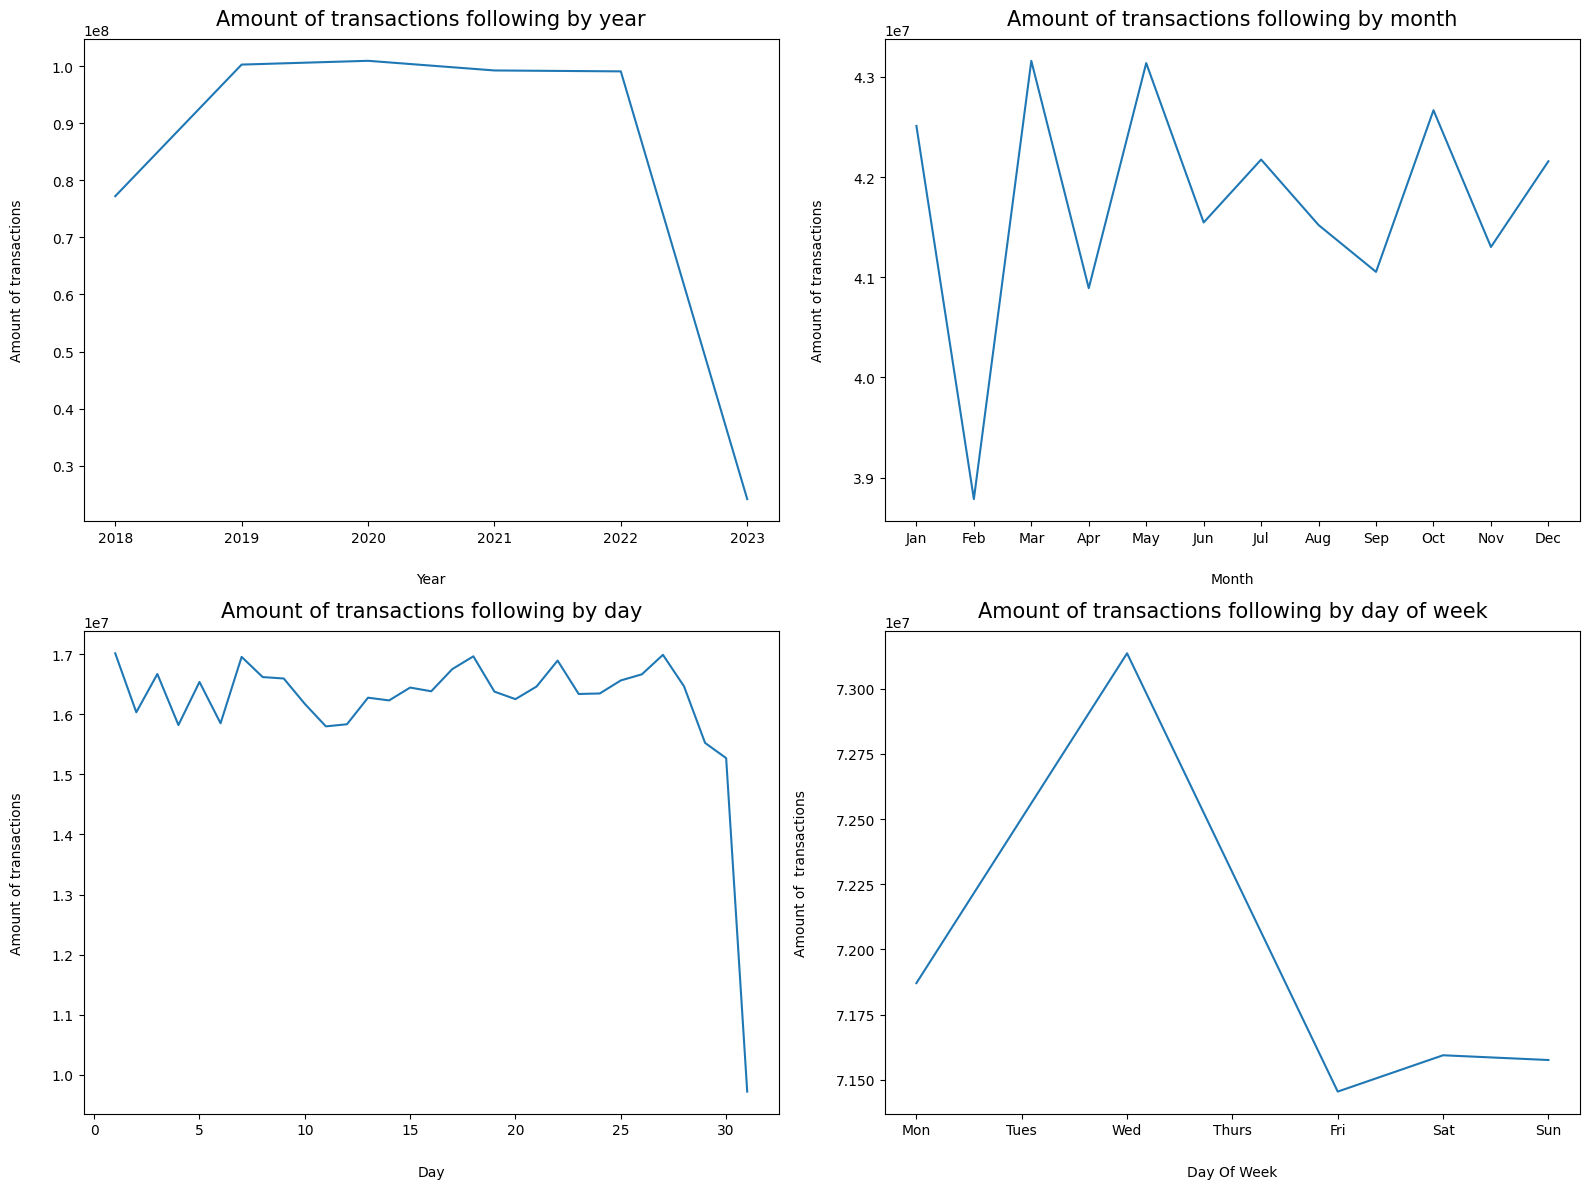

In [37]:
fig, axes = plt.subplots(2, 2 , figsize = (16, 12))

sns.lineplot(ax = axes[0, 0], data = amount_trans_by_year, x = 'year', y = 'total')
sns.lineplot(ax = axes[0, 1], data = amount_trans_by_month, x = 'month', y = 'total')
sns.lineplot(ax = axes[1, 0], data = amount_trans_by_day, x = 'day', y = 'total')
sns.lineplot(ax = axes[1, 1], data = amount_trans_by_day_of_week, x = 'day_of_week', y = 'total')

axes[0, 0].set_title("Amount of transactions following by year", pad=10, fontsize=15)
axes[0, 0].set_ylabel("Amount of transactions", labelpad=20)
axes[0, 0].set_xlabel("Year", labelpad=20)

axes[0, 1].set_title("Amount of transactions following by month", pad=10, fontsize=15)
axes[0, 1].set_ylabel("Amount of transactions", labelpad=20)
axes[0, 1].set_xlabel("Month", labelpad=20)

axes[1, 0].set_title("Amount of transactions following by day", pad=10, fontsize=15)
axes[1, 0].set_ylabel("Amount of transactions", labelpad=20)
axes[1, 0].set_xlabel("Day", labelpad=20)

axes[1, 1].set_title("Amount of transactions following by day of week", pad=10, fontsize=15)
axes[1, 1].set_ylabel("Amount of  transactions", labelpad=20)
axes[1, 1].set_xlabel("Day Of Week", labelpad=20)
plt.tight_layout()
plt.show()

In [38]:
# Looking for potential customers

# top 10 potential customers
potential_customers_data = cleaned_data['customer_id'].value_counts().reset_index()
potential_customers_data.columns = ['customer_id', 'count']
potential_customers_data = potential_customers_data.sort_values(by = 'count', ascending = False).head(10)

In [39]:
# Number of transactions of potential customers following by year

cus_trans_by_year = cleaned_data.groupby(['customer_id', 'year']).size().reset_index()
cus_trans_by_year.columns = ['customer_id', 'year', 'count']
cus_trans_by_year = cus_trans_by_year.loc[cus_trans_by_year['customer_id'].isin(potential_customers_data['customer_id'].tolist())]

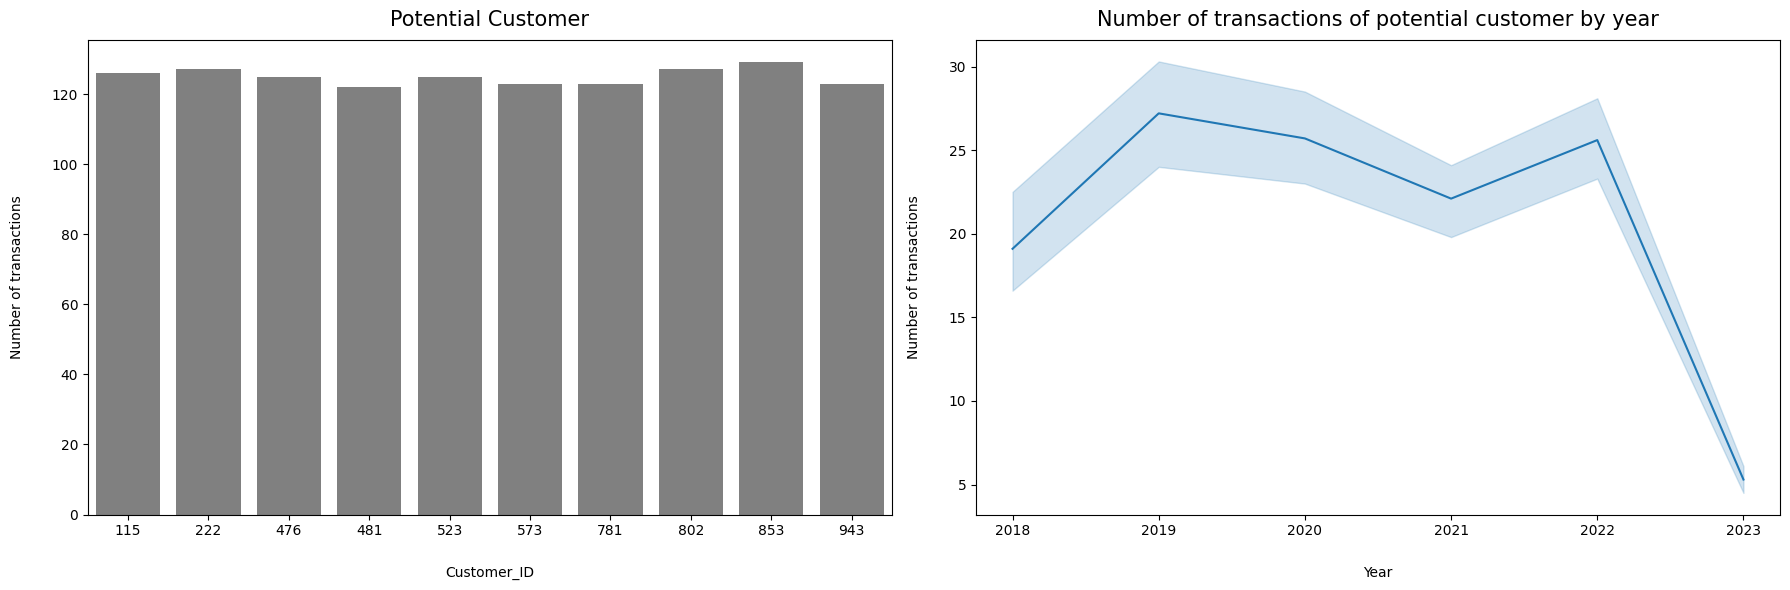

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18,6)) 

sns.barplot(ax = axes[0], data = potential_customers_data, x = 'customer_id', y = 'count', color = 'Grey')
sns.lineplot(ax = axes[1], data = cus_trans_by_year, x = 'year', y = 'count')

axes[0].set_title("Potential Customer", pad=10, fontsize=15)
axes[0].set_ylabel("Number of transactions", labelpad=20)
axes[0].set_xlabel("Customer_ID", labelpad=20)

axes[1].set_title("Number of transactions of potential customer by year", pad=10, fontsize=15)
axes[1].set_ylabel("Number of transactions", labelpad=20)
axes[1].set_xlabel("Year", labelpad=20)

plt.tight_layout()

plt.show()

In [41]:
# Rating of CDT Fincance Transaction

CDT_data = cleaned_data['type'].value_counts().reset_index()
CDT_data.columns = ['type', 'count']

In [42]:
# number of CDT transactions following by year
CDT_trans_by_year = cleaned_data.groupby(['type', 'year']).size().reset_index()
CDT_trans_by_year.columns = ['type', 'year', 'count']

# number of CDT transactions following by month
CDT_trans_by_month = cleaned_data.groupby(['type', 'month']).size().reset_index()
CDT_trans_by_month.columns = ['type', 'month', 'count']

cats = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
cat_type = CategoricalDtype(categories=cats, ordered=True)
CDT_trans_by_month['month'] = CDT_trans_by_month['month'].astype(cat_type)

# number of CDT transactions following by day
CDT_trans_by_day = cleaned_data.groupby(['type', 'day']).size().reset_index()
CDT_trans_by_day.columns = ['type', 'day', 'count']

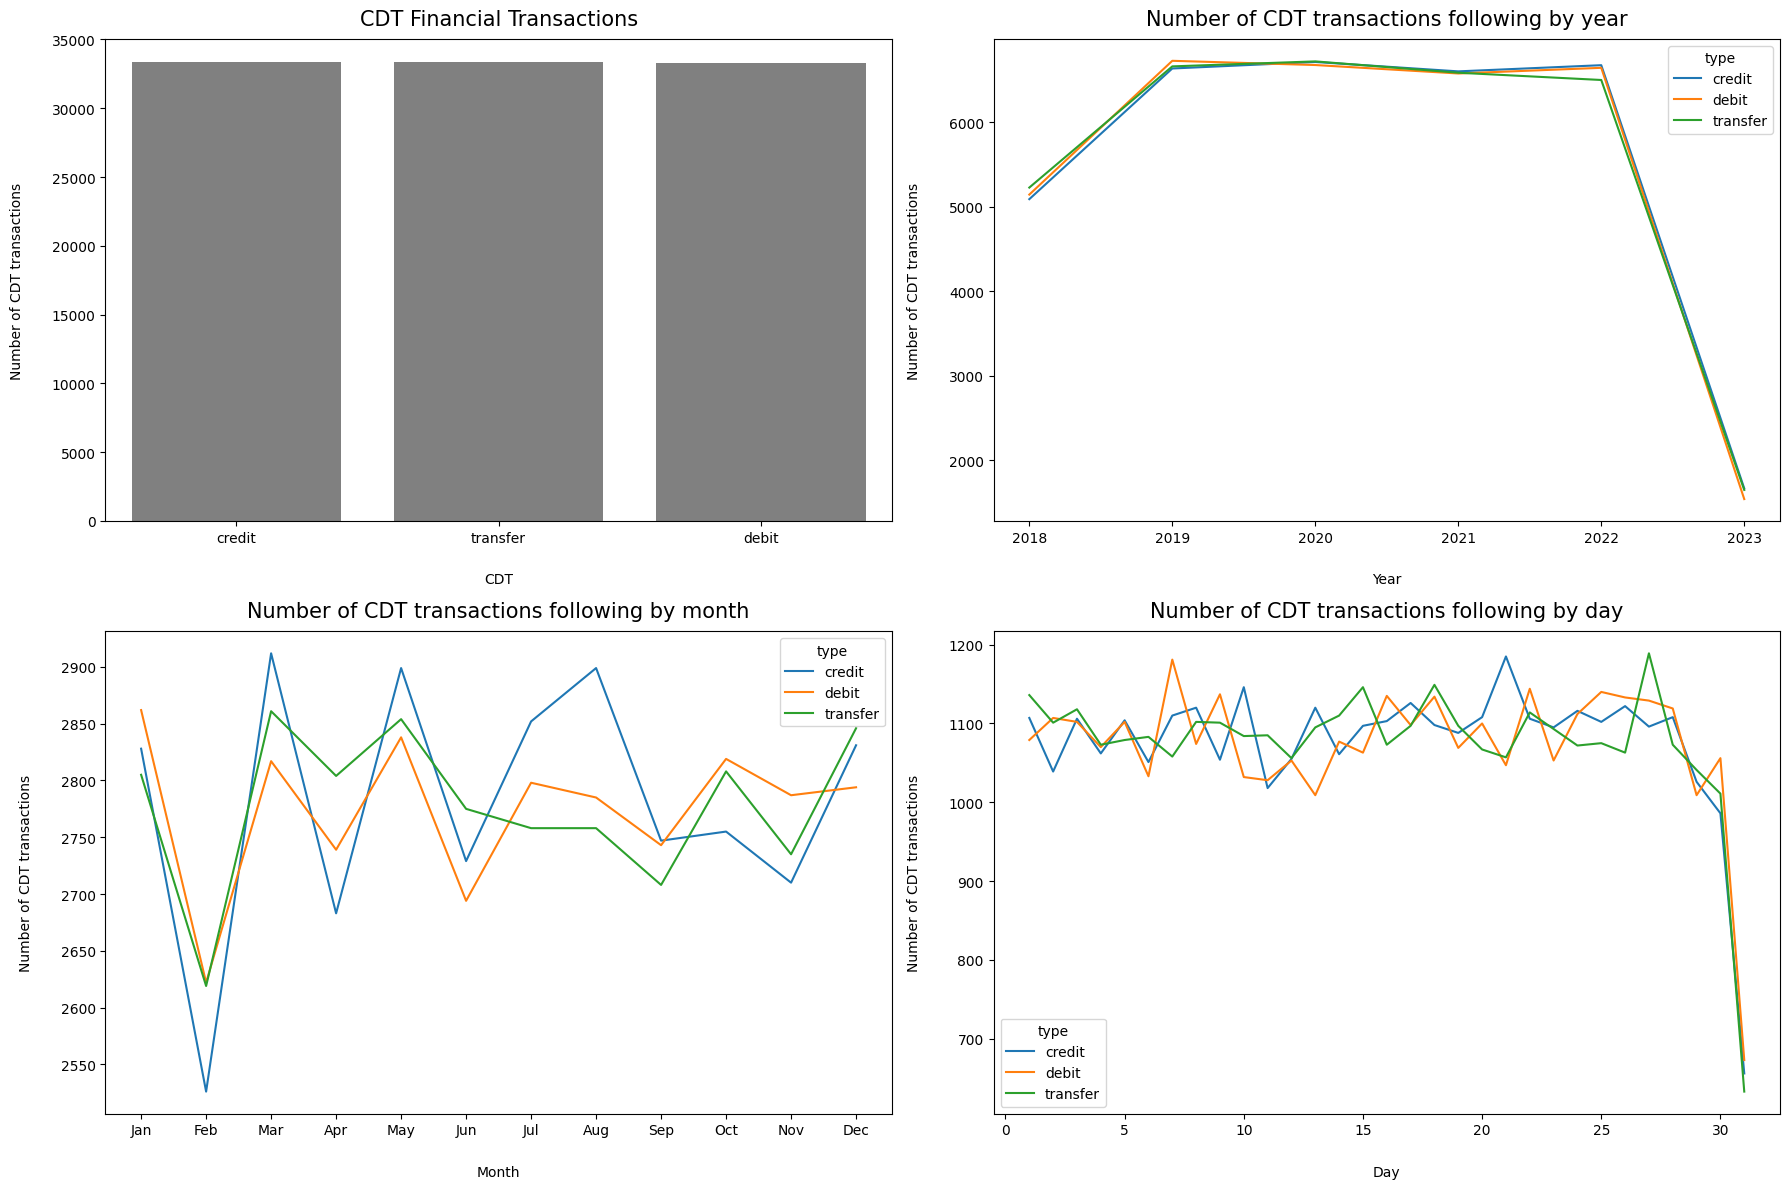

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(18,12)) 


sns.barplot(ax = axes[0, 0], data = CDT_data, x = 'type', y = 'count', color = 'Grey')
sns.lineplot(ax = axes[0, 1], data = CDT_trans_by_year, x = 'year', y = 'count', hue = 'type')
sns.lineplot(ax = axes[1, 0], data = CDT_trans_by_month, x = 'month', y = 'count', hue = 'type')
sns.lineplot(ax = axes[1, 1], data = CDT_trans_by_day, x = 'day', y = 'count', hue = 'type')

axes[0, 0].set_title("CDT Financial Transactions", pad=10, fontsize=15)
axes[0, 0].set_ylabel("Number of CDT transactions", labelpad=20)
axes[0, 0].set_xlabel("CDT", labelpad=20)

axes[0, 1].set_title("Number of CDT transactions following by year", pad=10, fontsize=15)
axes[0, 1].set_ylabel("Number of CDT transactions", labelpad=20)
axes[0, 1].set_xlabel("Year", labelpad=20)

axes[1, 0].set_title("Number of CDT transactions following by month", pad=10, fontsize=15)
axes[1, 0].set_ylabel("Number of CDT transactions", labelpad=20)
axes[1, 0].set_xlabel("Month", labelpad=20)

axes[1, 1].set_title("Number of CDT transactions following by day", pad=10, fontsize=15)
axes[1, 1].set_ylabel("Number of CDT transactions", labelpad=20)
axes[1, 1].set_xlabel("Day", labelpad=20)

plt.tight_layout()

plt.show()

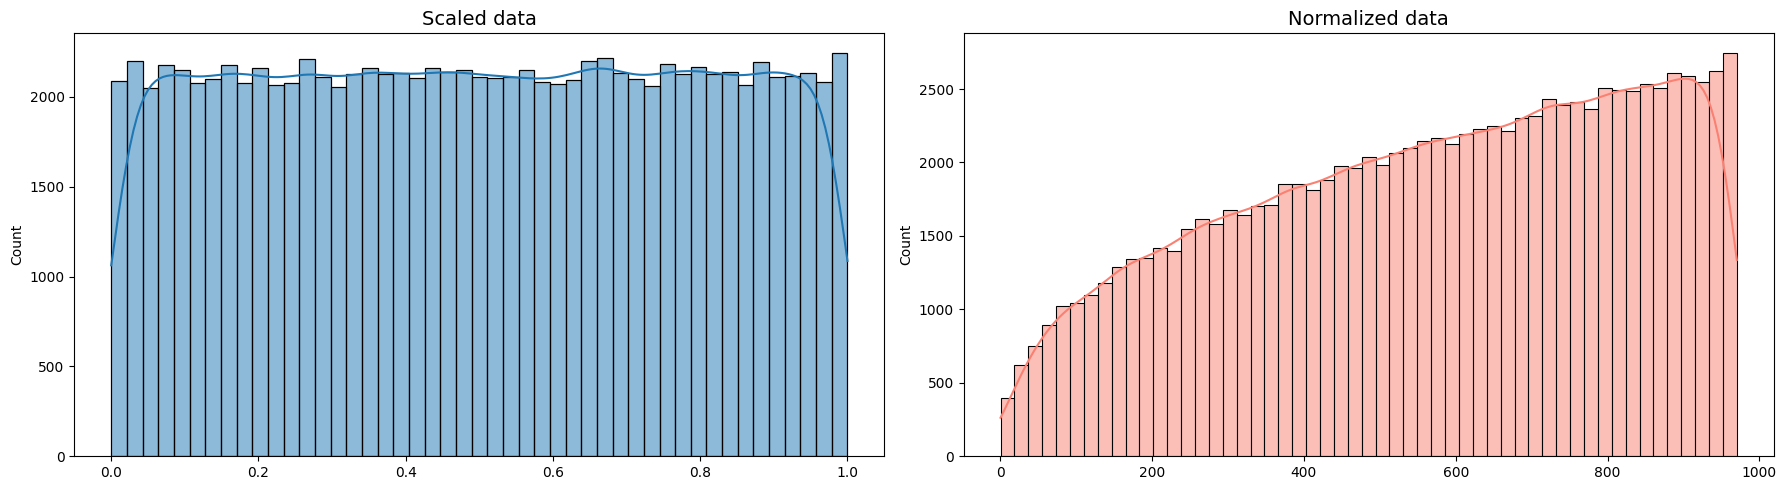

In [44]:
# Scaling and Normalization of Transaction Amount

# plot both together to compare
fig, axes=plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(scaled_data, ax = axes[0], kde=True, color='skyblue', legend = False)
axes[0].set_title("Scaled data", fontsize=14)

sns.histplot(normalized_data[0], ax=axes[1], kde=True, color='salmon', legend = False)
axes[1].set_title("Normalized data", fontsize=14)

plt.tight_layout()
plt.show()